# Cyper Attackes Project

## import libararies 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# import dataset 

In [8]:

rd = pd.read_excel(r"C:\Users\AdminOS\Desktop\Data Analises\final project\dataset syper attacks.xlsx")
rd

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019.0,Phishing,Education,80.53,773169.0,Hacker Group,Unpatched Software,VPN,63.0
1,China,2019.0,Ransomware,Retail,62.19,295961.0,Hacker Group,Unpatched Software,Firewall,71.0
2,India,2017.0,Man-in-the-Middle,IT,38.65,605895.0,Hacker Group,Weak Passwords,VPN,20.0
3,Germany,2024.0,Phishing,Healthcare,84.53,189430.0,Nation-state,Social Engineering,Firewall,1.0
4,Germany,2018.0,Man-in-the-Middle,IT,74.41,810682.0,Insider,Social Engineering,VPN,68.0
...,...,...,...,...,...,...,...,...,...,...
2998,Russia,2015.0,Malware,Government,54.59,728308.0,Unknown,Zero-day,Firewall,10.0
2999,Germany,2021.0,SQL Injection,Retail,48.20,480984.0,Unknown,Zero-day,VPN,64.0
3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## clean columns headers

In [9]:

rd.columns = rd.columns.str.strip()
rd.columns = rd.columns.str.replace(' ', '_')
rd.columns = rd.columns.str.replace('[()]', '', regex=True)
rd.columns = rd.columns.str.replace('\$', '', regex=True )

print(rd.columns.tolist())
rd.head(5)

['Country', 'Year', 'Attack_Type', 'Target_Industry', 'Financial_Loss_in_Million_', 'Number_of_Affected_Users', 'Attack_Source', 'Security_Vulnerability_Type', 'Defense_Mechanism_Used', 'Incident_Resolution_Time_in_Hours']


,Country,Year,Attack_Type,Target_Industry,Financial_Loss_in_Million_,Number_of_Affected_Users,Attack_Source,Security_Vulnerability_Type,Defense_Mechanism_Used,Incident_Resolution_Time_in_Hours
0,China,2019.0,Phishing,Education,80.53,773169.0,Hacker Group,Unpatched Software,VPN,63.0
1,China,2019.0,Ransomware,Retail,62.19,295961.0,Hacker Group,Unpatched Software,Firewall,71.0
2,India,2017.0,Man-in-the-Middle,IT,38.65,605895.0,Hacker Group,Weak Passwords,VPN,20.0
3,Germany,2024.0,Phishing,Healthcare,84.53,189430.0,Nation-state,Social Engineering,Firewall,1.0
4,Germany,2018.0,Man-in-the-Middle,IT,74.41,810682.0,Insider,Social Engineering,VPN,68.0


In [10]:
rd.columns = rd.columns.str.replace('_$', '', regex=True)
print(rd.columns.tolist())


['Country', 'Year', 'Attack_Type', 'Target_Industry', 'Financial_Loss_in_Million', 'Number_of_Affected_Users', 'Attack_Source', 'Security_Vulnerability_Type', 'Defense_Mechanism_Used', 'Incident_Resolution_Time_in_Hours']


In [11]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            3000 non-null   object 
 1   Year                               3000 non-null   float64
 2   Attack_Type                        3000 non-null   object 
 3   Target_Industry                    3000 non-null   object 
 4   Financial_Loss_in_Million          3000 non-null   float64
 5   Number_of_Affected_Users           3000 non-null   float64
 6   Attack_Source                      3000 non-null   object 
 7   Security_Vulnerability_Type        3000 non-null   object 
 8   Defense_Mechanism_Used             3000 non-null   object 
 9   Incident_Resolution_Time_in_Hours  3001 non-null   float64
dtypes: float64(4), object(6)
memory usage: 234.7+ KB


In [12]:
rd.dropna(inplace=True)
print(rd.isna().sum())

Country                              0
Year                                 0
Attack_Type                          0
Target_Industry                      0
Financial_Loss_in_Million            0
Number_of_Affected_Users             0
Attack_Source                        0
Security_Vulnerability_Type          0
Defense_Mechanism_Used               0
Incident_Resolution_Time_in_Hours    0
dtype: int64


## explore dataset


In [13]:
rd.describe()

,Year,Financial_Loss_in_Million,Number_of_Affected_Users,Incident_Resolution_Time_in_Hours
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [14]:
rd['Country'].value_counts()


Country
UK           321
Brazil       310
India        308
Japan        305
France       305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64

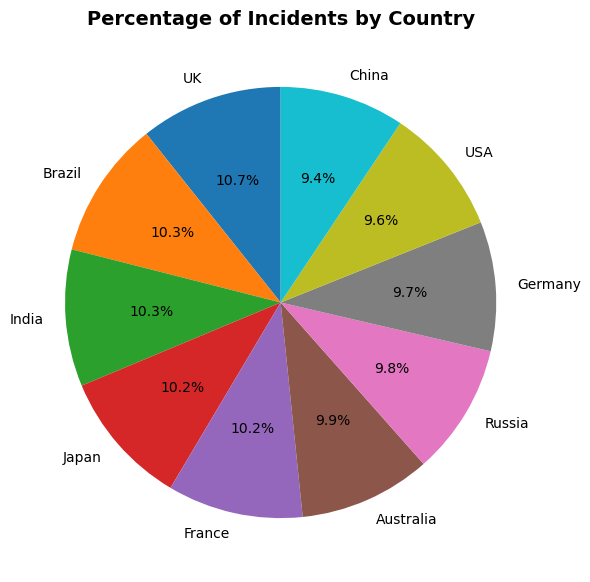

In [15]:
# This pie chart shows the distribution of incidents by country 
# and provides an idea of which countries experience the highest number of incidents
# where each segment of the circle represents the country's percentage of the total incidents.
country_counts = rd['Country'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(country_counts.values, labels=country_counts.index,
        autopct='%1.1f%%', startangle=90)

plt.title('Percentage of Incidents by Country', fontsize=14, fontweight='bold')
plt.show()


In [16]:
rd['Attack_Type'].value_counts()

Attack_Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64

In [17]:
rd['Target_Industry'].value_counts()

Target_Industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: count, dtype: int64

In [18]:
rd['Attack_Source'].value_counts()

Attack_Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64

In [19]:
rd['Security_Vulnerability_Type'].value_counts()

Security_Vulnerability_Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64

In [20]:
rd['Defense_Mechanism_Used'].value_counts()

Defense_Mechanism_Used
Antivirus             628
VPN                   612
Encryption            592
Firewall              585
AI-based Detection    583
Name: count, dtype: int64

### Total Financial loss by Country (in billions)


C:\Users\AdminOS\AppData\Local\Temp\ipykernel_5108\338305195.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


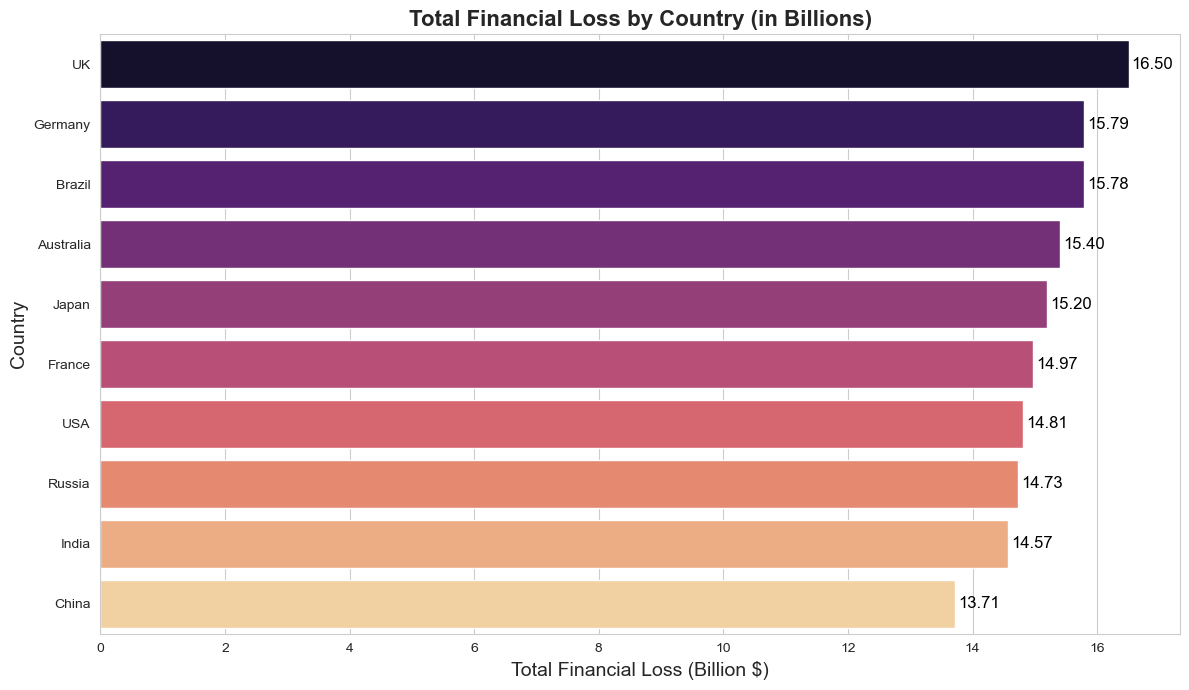

In [21]:

loss_by_country = rd.groupby('Country')['Financial_Loss_in_Million'].sum().sort_values(ascending=False) / 1000

plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

bar_plot = sns.barplot(
    x=loss_by_country.values,
    y=loss_by_country.index,
    palette="magma"
)


for i, v in enumerate(loss_by_country.values):
    plt.text(v + 0.05, i, f"{v:.2f}", color='black', va='center', fontsize=12)


plt.title("Total Financial Loss by Country (in Billions)", fontsize=16, weight='bold')
plt.xlabel("Total Financial Loss (Billion $)", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tight_layout()
plt.show()

### Top 4 countries by Total loss


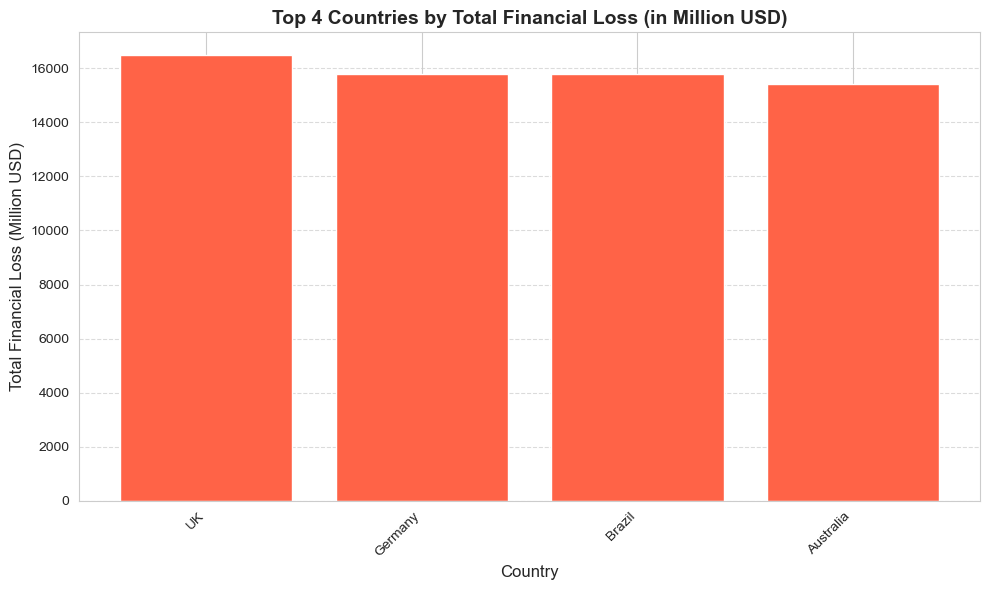

In [22]:

loss_by_country = (
    rd.groupby('Country')['Financial_Loss_in_Million']
    .sum()
    .sort_values(ascending=False)
)
top_n = 4

top_losses = loss_by_country.head(top_n)

plt.figure(figsize=(10,6))
plt.bar(top_losses.index, top_losses.values, color='tomato')

plt.title(f'Top {top_n} Countries by Total Financial Loss (in Million USD)',
          fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Financial Loss (Million USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Top 3 Attack Type Couse financial Loss


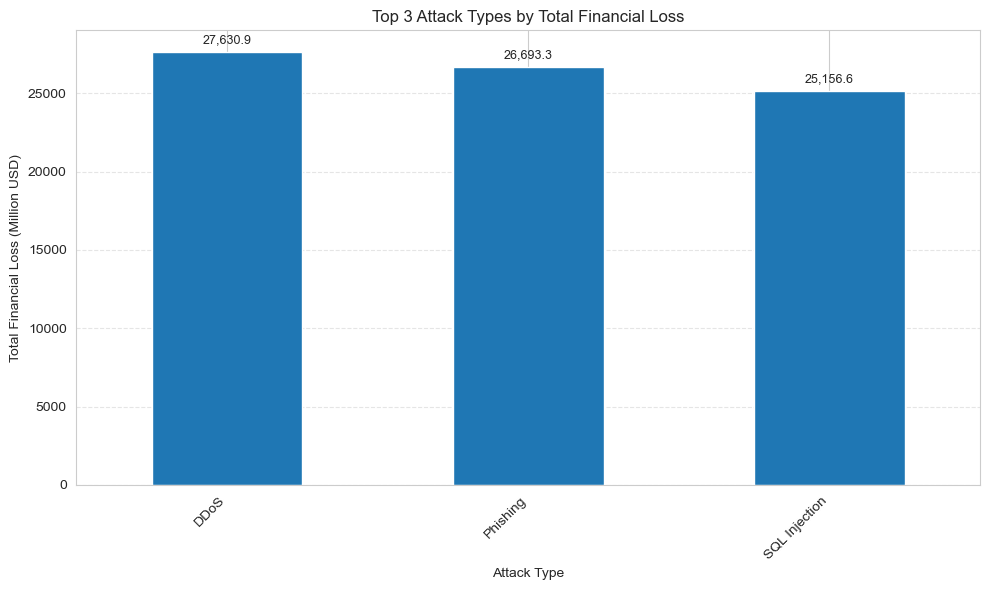

In [23]:

top_n = 3                 
plot_kind = 'bar'         
value_label = True 
figsize = (10,6)

loss_col = 'Financial_Loss_in_Million'
attack_col = 'Attack_Type'


rd[loss_col] = pd.to_numeric(rd[loss_col], errors='coerce').fillna(0)

loss_by_attack = rd.groupby(attack_col)[loss_col].sum().sort_values(ascending=False)

top_losses = loss_by_attack.head(top_n)


plt.figure(figsize=figsize)

if plot_kind == 'barh':
    ax = top_losses.plot(kind='barh')
    ax.invert_yaxis()
    plt.xlabel('Total Financial Loss (Million USD)')
    plt.ylabel('Attack Type')
    plt.title(f'Top {len(top_losses)} Attack Types by Total Financial Loss')
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    
    if value_label:
        for i, v in enumerate(top_losses.values):
            ax.text(v + max(top_losses.values)*0.01, i, f'{v:,.1f}', va='center')

elif plot_kind == 'bar':
    ax = top_losses.plot(kind='bar')
    plt.xlabel('Attack Type')
    plt.ylabel('Total Financial Loss (Million USD)')
    plt.title(f'Top {len(top_losses)} Attack Types by Total Financial Loss')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    if value_label:
        for p in ax.patches:
            ax.annotate(f'{p.get_height():,.1f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=9, xytext=(0,4), textcoords='offset points')

elif plot_kind == 'pie':
    plt.figure(figsize=(8,8))
    plt.pie(top_losses.values, labels=top_losses.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Top {len(top_losses)} Attack Types by Share of Total Loss')
    plt.axis('equal')

else:
    raise ValueError("plot_kind must be 'barh', 'bar' or 'pie'")

plt.tight_layout()
plt.show()

### Industries Most Affected by Cyberattack Losses


Target_Industry
IT                    24809.83
Banking               22772.39
Government            21205.33
Retail                21119.55
Healthcare            21041.29
Telecommunications    20459.09
Education             20071.43
Name: Financial_Loss_in_Million, dtype: float64


C:\Users\AdminOS\AppData\Local\Temp\ipykernel_5108\3716885294.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette="Reds_r")


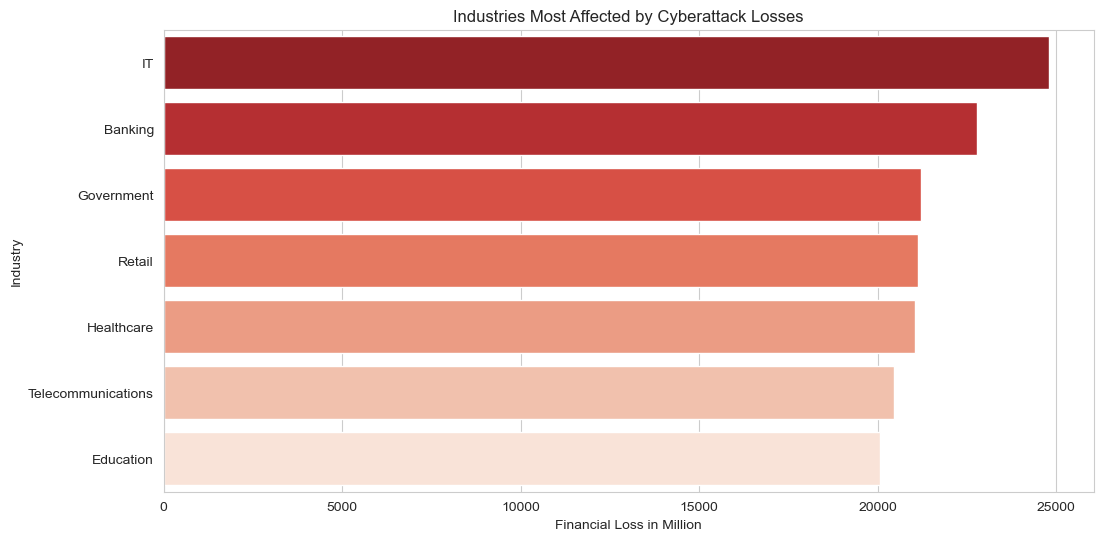

In [24]:

industry_loss = rd.groupby('Target_Industry')['Financial_Loss_in_Million'].sum().sort_values(ascending=False)


top_industries = industry_loss.head(10)
print(top_industries)

plt.figure(figsize=(12,6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette="Reds_r")
plt.xlabel("Financial Loss in Million")
plt.ylabel("Industry")
plt.title("Industries Most Affected by Cyberattack Losses")
plt.show()

### Trend of Cyberattack Losses Over Years


Year
2017.0    16261.68
2023.0    15958.08
2021.0    15873.41
2022.0    15870.86
2020.0    15767.95
2024.0    15434.29
2018.0    14720.48
2015.0    14510.21
2016.0    13947.26
2019.0    13134.69
Name: Financial_Loss_in_Million, dtype: float64


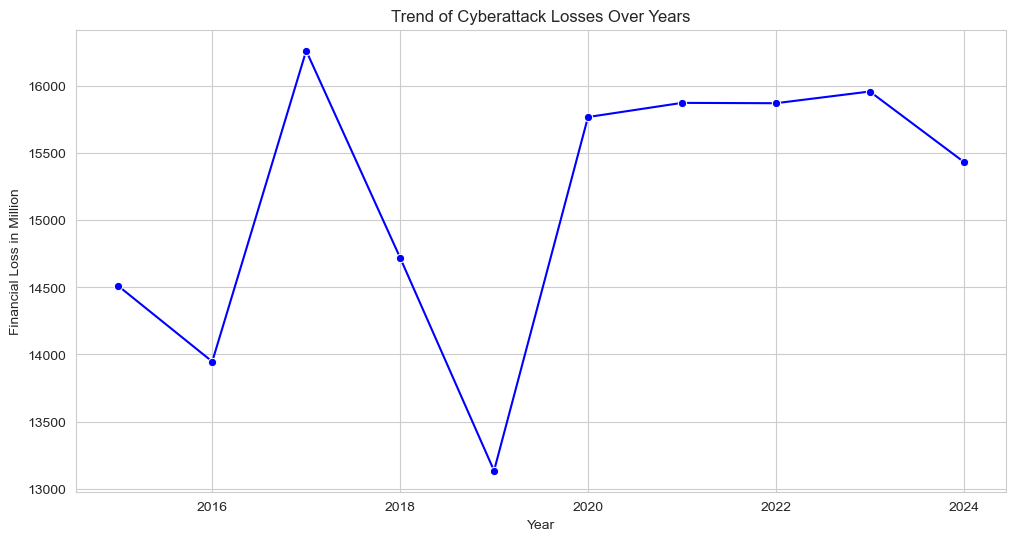

In [25]:
yearly_loss = rd.groupby('Year')['Financial_Loss_in_Million'].sum().sort_values(ascending=False)

top_years = yearly_loss.head(10)
print(top_years)

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_loss.index, y=yearly_loss.values, marker='o', color='blue')
plt.xlabel("Year")
plt.ylabel("Financial Loss in Million")
plt.title("Trend of Cyberattack Losses Over Years")
plt.grid(True)
plt.show()

### why was the lowest loss in 2019 ?

In [26]:

# 2019
data_2019 = rd[rd['Year'] == 2019]


num_attacks_2019 = data_2019.shape[0]
print(f"Number of attacks in 2019: {num_attacks_2019}")


avg_loss_2019 = data_2019['Financial_Loss_in_Million'].mean()
print(f"Average financial loss per attack in 2019: {avg_loss_2019:.2f} Million")


industry_loss_2019 = data_2019.groupby('Target_Industry')['Financial_Loss_in_Million'].sum().sort_values(ascending=False)
print("Top industries affected in 2019:")
print(industry_loss_2019)

# Number of attacks by type 
attack_type_count_2019 = data_2019['Attack_Type'].value_counts()
print("Number of attacks by type in 2019:")
print(attack_type_count_2019)


Number of attacks in 2019: 263
Average financial loss per attack in 2019: 49.94 Million
Top industries affected in 2019:
Target_Industry
Government            2193.45
Telecommunications    2141.19
Banking               2117.61
IT                    2089.18
Healthcare            1719.82
Education             1643.33
Retail                1230.11
Name: Financial_Loss_in_Million, dtype: float64
Number of attacks by type in 2019:
Attack_Type
DDoS                 48
Phishing             45
SQL Injection        45
Man-in-the-Middle    44
Malware              43
Ransomware           38
Name: count, dtype: int64


### Why was the highest loss in 2017 ?

In [27]:


data_2017 = rd[rd['Year'] == 2017]

num_attacks_2017 = data_2017.shape[0]
print(f"Number of attacks in 2017: {num_attacks_2017}")


avg_loss_2017 = data_2017['Financial_Loss_in_Million'].mean()
print(f"Average financial loss per attack in 2017: {avg_loss_2017:.2f} Million")


industry_loss_2017 = data_2017.groupby('Target_Industry')['Financial_Loss_in_Million'].sum().sort_values(ascending=False)
print("Top industries affected in 2017:")
print(industry_loss_2017)

attack_type_count_2017 = data_2017['Attack_Type'].value_counts()
print("Number of attacks by type in 2017:")
print(attack_type_count_2017)

Number of attacks in 2017: 319
Average financial loss per attack in 2017: 50.98 Million
Top industries affected in 2017:
Target_Industry
Government            2747.86
Healthcare            2702.01
IT                    2551.06
Retail                2278.50
Banking               2220.96
Education             2129.32
Telecommunications    1631.97
Name: Financial_Loss_in_Million, dtype: float64
Number of attacks by type in 2017:
Attack_Type
Phishing             64
Man-in-the-Middle    58
DDoS                 58
SQL Injection        49
Malware              46
Ransomware           44
Name: count, dtype: int64


### Top 10 years with most attacks


In [28]:
attacks_per_year = rd['Year'].value_counts().sort_values(ascending=False)


most_attacks_year = attacks_per_year.idxmax()
most_attacks_count = attacks_per_year.max()
print(f"The year with the most attacks is {most_attacks_year} with {most_attacks_count} attacks.")
print("\nTop 10 years with most attacks:")
print(attacks_per_year.head(10))

The year with the most attacks is 2017.0 with 319 attacks.

Top 10 years with most attacks:
Year
2017.0    319
2022.0    318
2020.0    315
2023.0    315
2018.0    310
2021.0    299
2024.0    299
2016.0    285
2015.0    277
2019.0    263
Name: count, dtype: int64


### comparison between the years 2017 and 2019 in terms of industries


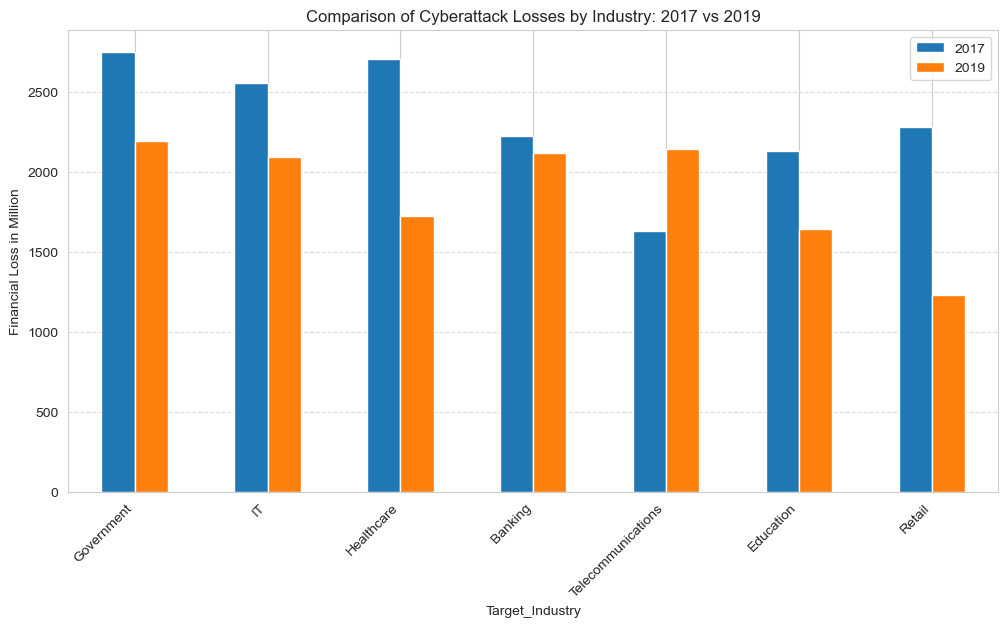

In [29]:

data_2017 = rd[rd['Year'] == 2017]
data_2019 = rd[rd['Year'] == 2019]


industry_loss_2017 = data_2017.groupby('Target_Industry')['Financial_Loss_in_Million'].sum()
industry_loss_2019 = data_2019.groupby('Target_Industry')['Financial_Loss_in_Million'].sum()


industry_comparison = pd.DataFrame({
    '2017': industry_loss_2017,
    '2019': industry_loss_2019
}).fillna(0)  


industry_comparison['Total'] = industry_comparison['2017'] + industry_comparison['2019']
industry_comparison = industry_comparison.sort_values('Total', ascending=False).drop('Total', axis=1)


industry_comparison.plot(kind='bar', figsize=(12,6))
plt.ylabel("Financial Loss in Million")
plt.title("Comparison of Cyberattack Losses by Industry: 2017 vs 2019")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Number of Cyber Attacks by Country


C:\Users\AdminOS\AppData\Local\Temp\ipykernel_5108\2558645719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


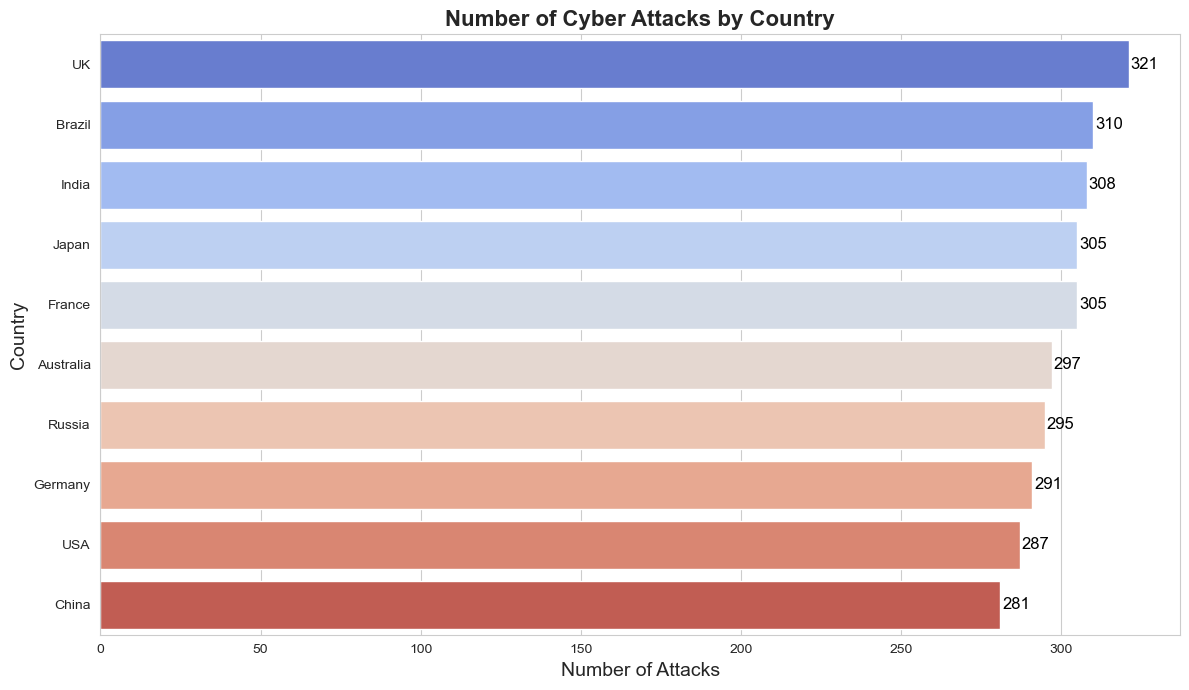

In [30]:
attacks_by_country = rd['Country'].value_counts()

plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

bar_plot = sns.barplot(
    x=attacks_by_country.values,
    y=attacks_by_country.index,
    palette="coolwarm"
)

for i, v in enumerate(attacks_by_country.values):
    plt.text(v + 0.5, i, str(v), color='black', va='center', fontsize=12)

plt.title("Number of Cyber Attacks by Country", fontsize=16, weight='bold')
plt.xlabel("Number of Attacks", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tight_layout()
plt.show()

### Percentage of Incidents by Country


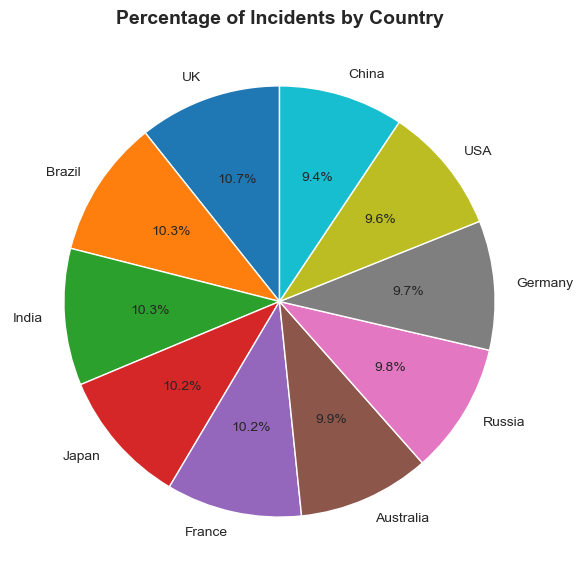

In [31]:
country_counts = rd['Country'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(country_counts.values, labels=country_counts.index,
        autopct='%1.1f%%', startangle=90)

plt.title('Percentage of Incidents by Country', fontsize=14, fontweight='bold')
plt.show()


### Average Number of Affected Users by Attack Type


Attack_Type
Man-in-the-Middle    520064.320261
SQL Injection        512469.833002
Malware              508780.232990
Ransomware           502825.369168
DDoS                 499437.410546
Phishing             487179.536862
Name: Number_of_Affected_Users, dtype: float64


C:\Users\AdminOS\AppData\Local\Temp\ipykernel_5108\4023476810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_user_impact.values, y=attack_user_impact.index, palette="coolwarm")


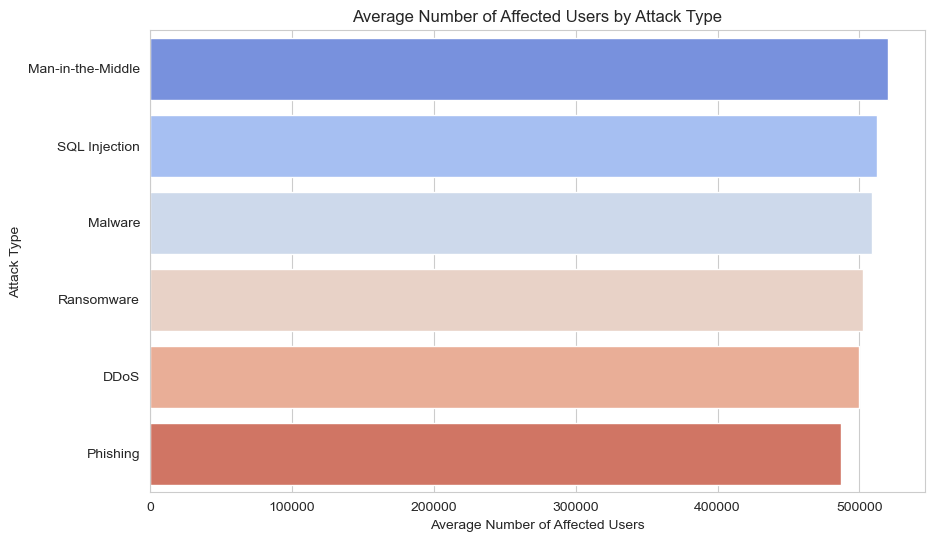

In [32]:

attack_user_impact = rd.groupby('Attack_Type')['Number_of_Affected_Users'].mean().sort_values(ascending=False)


print(attack_user_impact)

plt.figure(figsize=(10,6))
sns.barplot(x=attack_user_impact.values, y=attack_user_impact.index, palette="coolwarm")
plt.xlabel("Average Number of Affected Users")
plt.ylabel("Attack Type")
plt.title("Average Number of Affected Users by Attack Type")
plt.show()

### Average Number of Affected Users for Top 3 Attack Types Over the Years


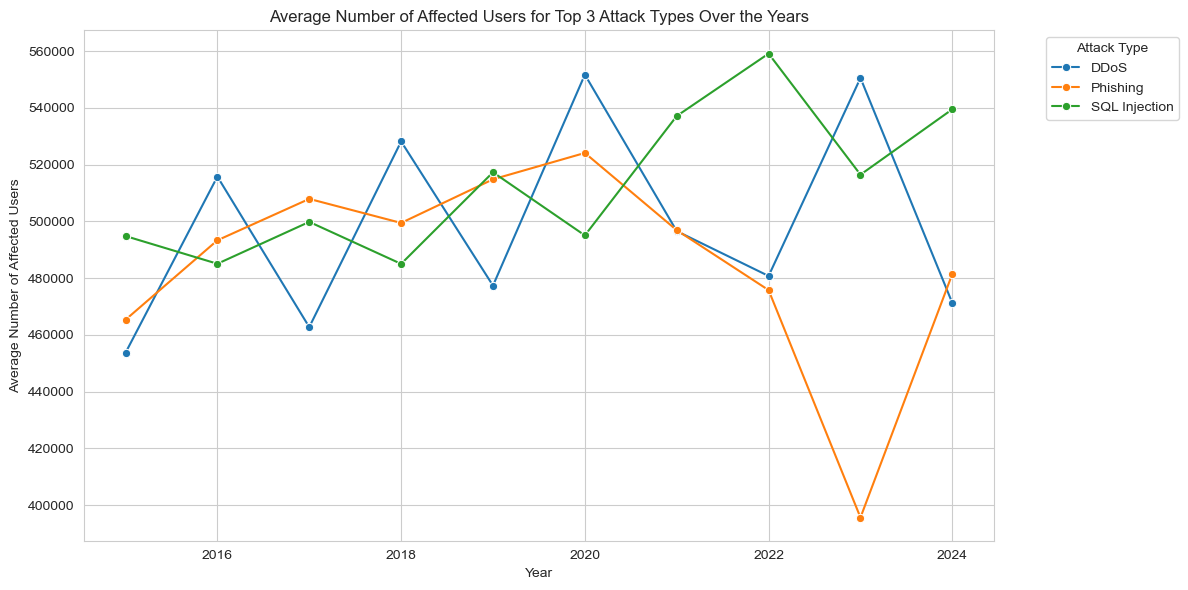

In [33]:
top3_attacks = (
    rd.groupby('Attack_Type')['Number_of_Affected_Users']
      .sum()
      .sort_values(ascending=False)
      .head(3)
      .index
)


rd_top3 = rd[rd['Attack_Type'].isin(top3_attacks)]


attack_year_impact = (
    rd_top3.groupby(['Year', 'Attack_Type'])['Number_of_Affected_Users']
      .mean()
      .reset_index()
)


plt.figure(figsize=(12,6))
sns.lineplot(
    data=attack_year_impact,
    x='Year',
    y='Number_of_Affected_Users',
    hue='Attack_Type',
    marker='o'
)
plt.title("Average Number of Affected Users for Top 3 Attack Types Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Number of Affected Users")
plt.grid(True)
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Average Number of Affected Users by Security Vulnerability Type


C:\Users\AdminOS\AppData\Local\Temp\ipykernel_5108\3882029976.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


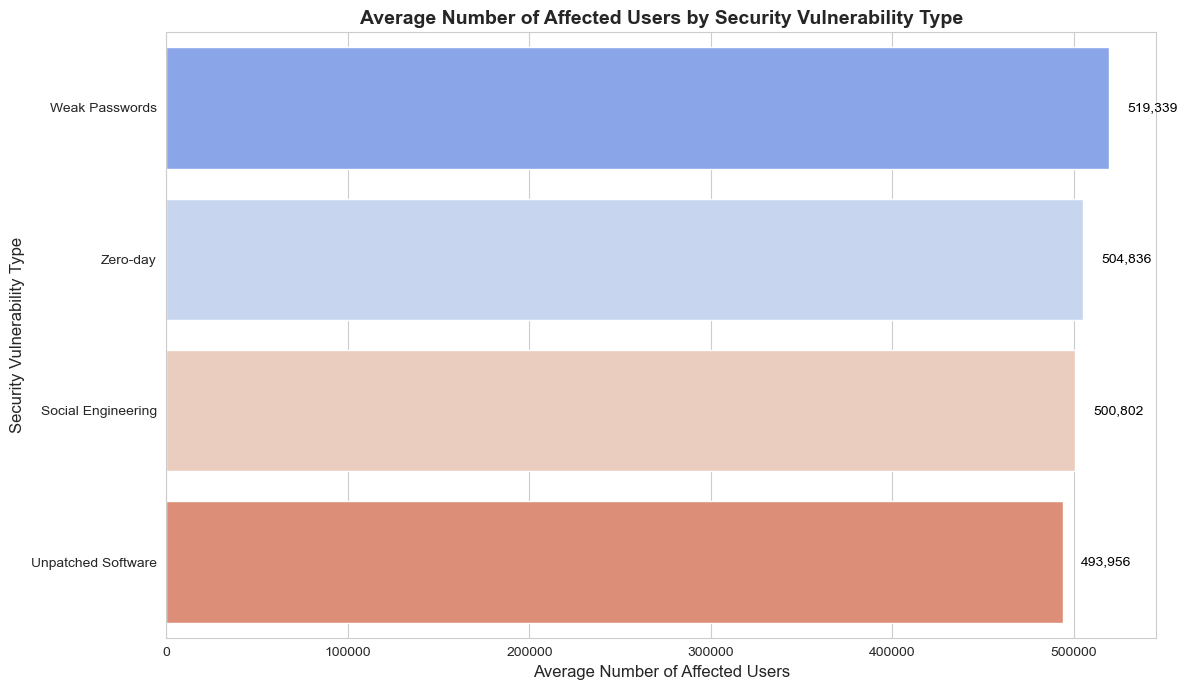

In [34]:

rd = rd.dropna(subset=['Security_Vulnerability_Type', 'Number_of_Affected_Users'])

vulnerability_impact = (
    rd.groupby('Security_Vulnerability_Type')['Number_of_Affected_Users']
      .mean()
      .sort_values(ascending=False)
)

vul_df = vulnerability_impact.reset_index()

plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=vul_df,
    x='Number_of_Affected_Users',
    y='Security_Vulnerability_Type',
    palette="coolwarm"
)

for i, value in enumerate(vul_df['Number_of_Affected_Users']):
    ax.text(value + (value * 0.02), i, f"{value:,.0f}", va='center', fontsize=10, color='black')

plt.title("Average Number of Affected Users by Security Vulnerability Type", fontsize=14, weight='bold')
plt.xlabel("Average Number of Affected Users", fontsize=12)
plt.ylabel("Security Vulnerability Type", fontsize=12)
plt.tight_layout()
plt.show()

### Average Number of Affected Users by Industry


C:\Users\AdminOS\AppData\Local\Temp\ipykernel_5108\2930390886.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


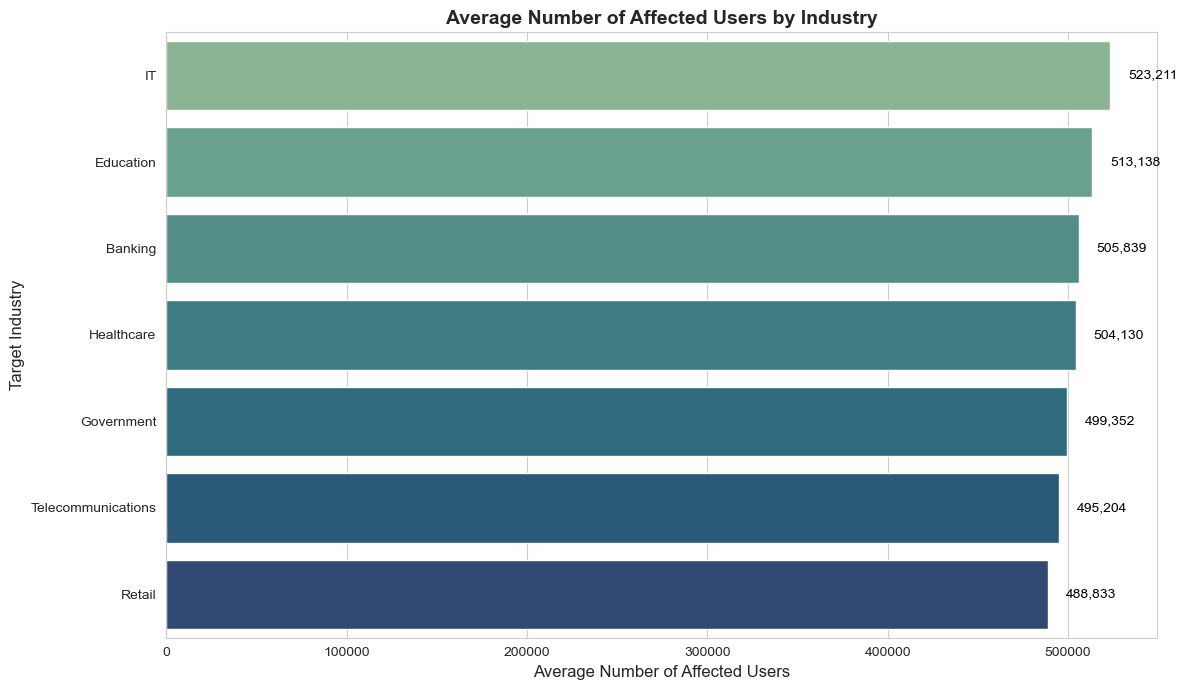

In [35]:
industry_impact = (
    rd.groupby('Target_Industry')['Number_of_Affected_Users']
      .mean()
      .sort_values(ascending=False)
)

industry_df = industry_impact.reset_index()


plt.figure(figsize=(12,7))
sns.set_style("whitegrid")


ax = sns.barplot(
    data=industry_df,
    x='Number_of_Affected_Users',
    y='Target_Industry',
    palette='crest'
)

for i, value in enumerate(industry_df['Number_of_Affected_Users']):
    ax.text(value + (value * 0.02), i, f"{value:,.0f}", va='center', fontsize=10, color='black')

plt.title("Average Number of Affected Users by Industry", fontsize=14, weight='bold')
plt.xlabel("Average Number of Affected Users", fontsize=12)
plt.ylabel("Target Industry", fontsize=12)
plt.tight_layout()
plt.show()

### Total Number of Affected Users by Country


C:\Users\AdminOS\AppData\Local\Temp\ipykernel_5108\42827536.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


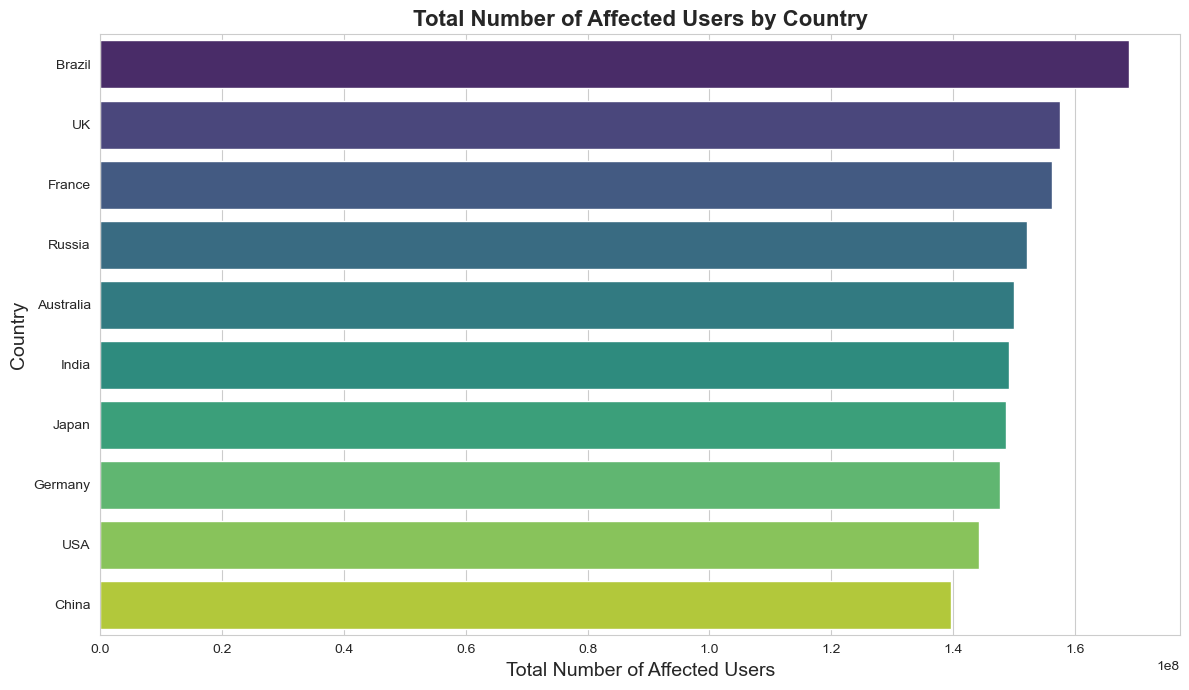

In [36]:
affected_by_country = rd.groupby('Country')['Number_of_Affected_Users'].sum().sort_values(ascending=False)


plt.figure(figsize=(12,7))
sns.set_style("whitegrid")


sns.barplot(
    x=affected_by_country.values,
    y=affected_by_country.index,
    palette="viridis"
)

plt.title("Total Number of Affected Users by Country", fontsize=16, weight='bold')
plt.xlabel("Total Number of Affected Users", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tight_layout()
plt.show()